In [1]:
#1.1

#Touch Tones
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

n = np.linspace(0,1000,1000)
#Signals of the phone keys
d0 = np.sin(0.7217*n) + np.sin(1.0247*n)
d1 = np.sin(0.5346*n) + np.sin(0.9273*n) 
d2 = np.sin(0.5346*n) + np.sin(1.0247*n)
d3 = np.sin(0.5346*n) + np.sin(1.1328*n)
d4 = np.sin(0.5906*n) + np.sin(0.9273*n)
d5 = np.sin(0.5906*n) + np.sin(1.0247*n)
d6 = np.sin(0.5906*n) + np.sin(1.1328*n)
d7 = np.sin(0.6535*n) + np.sin(0.9273*n)
d8 = np.sin(0.6535*n) + np.sin(1.0247*n)
d9 = np.sin(0.6535*n) + np.sin(1.1328*n)

#List with the signals
signal_list = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]

#Displaying the Audios
for i, signal in enumerate(signal_list):
   print("Digit: ",i)
   display(Audio(signal,rate=8192))


Digit:  0


Digit:  1


Digit:  2


Digit:  3


Digit:  4


Digit:  5


Digit:  6


Digit:  7


Digit:  8


Digit:  9


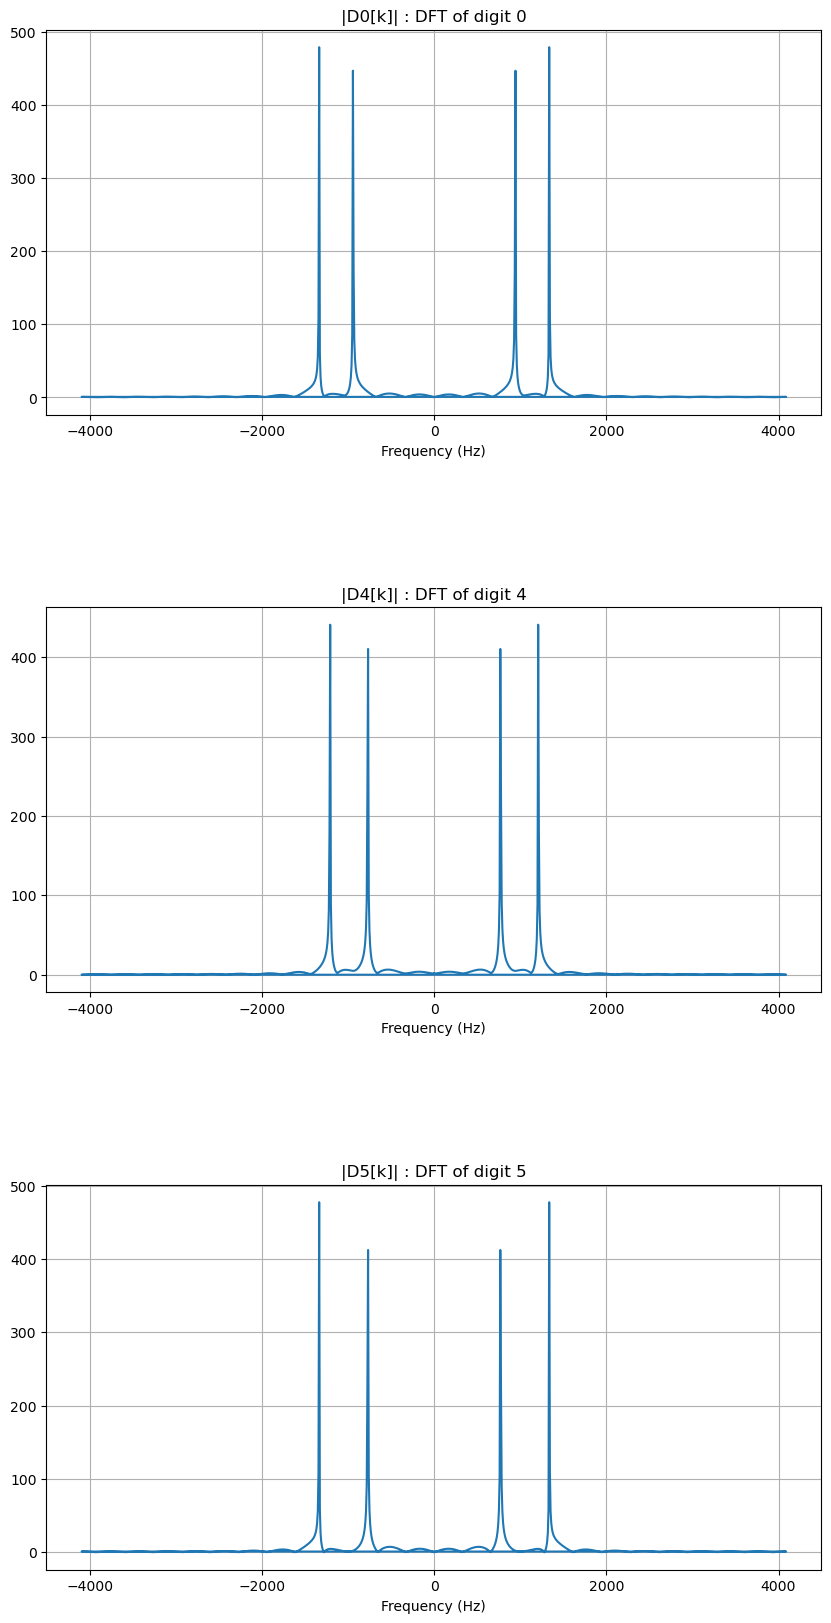

In [2]:
#1.2

#Creating the DFT's of digits 0,4,5
D0 = np.fft.fft(d0,1024)
D4 = np.fft.fft(d4,1024)
D5 = np.fft.fft(d5,1024)
f0 = np.fft.fftfreq(len(D0),1/8192)
f4 = np.fft.fftfreq(len(D4),1/8192)
f5 = np.fft.fftfreq(len(D5),1/8192)

#Larger graphs
plt.figure(figsize = (10,20))

#DFT of digit 0 plot
plt.subplot(3,1,1)
plt.plot(f0,np.abs(D0))
plt.xlabel('Frequency (Hz)')
plt.title('|D0[k]| : DFT of digit 0') 
plt.grid(True)

#DFT of digit 4 plot
plt.subplot(3,1,2)
plt.plot(f4,np.abs(D4))
plt.xlabel('Frequency (Hz)')
plt.title('|D4[k]| : DFT of digit 4')
plt.grid(True)

#DFT of digit 5 plot
plt.subplot(3,1,3)
plt.plot(f5,np.abs(D5))
plt.xlabel('Frequency (Hz)')
plt.title('|D5[k]| : DFT of digit 5')
plt.grid(True)

#Improving spacing between graphs
plt.subplots_adjust(hspace=0.5)





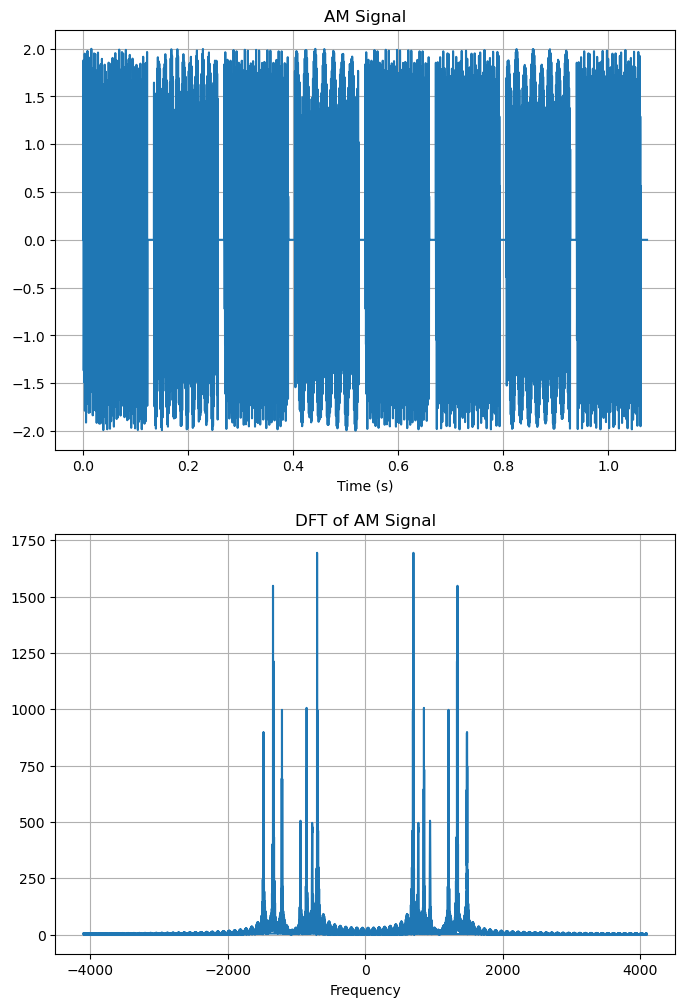

In [7]:
#1.3
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write as write_wav
from scipy.interpolate import interp1d

#AM = 03121868
#Digits we will need and a new linspace
n = np.linspace(0,1000,1000)
d0 = np.sin(0.7217*n) + np.sin(1.0247*n)
d1 = np.sin(0.5346*n) + np.sin(0.9273*n) 
d2 = np.sin(0.5346*n) + np.sin(1.0247*n)
d3 = np.sin(0.5346*n) + np.sin(1.1328*n)
d6 = np.sin(0.5906*n) + np.sin(1.1328*n)
d8 = np.sin(0.6535*n) + np.sin(1.0247*n)
d9 = np.sin(0.6535*n) + np.sin(1.1328*n)

#List of our AM digits
AM_signal_list = [d0, d3, d1, d2, d1, d8, d6, d8]

#Extending each digit signal with 100 zeros and appending each of them in a list
extended_signals_list = []
for signal in (AM_signal_list):
    extended_signal = np.concatenate((signal, np.zeros(100)))
    extended_signals_list.append(extended_signal)

AM= np.concatenate(extended_signals_list)
display(Audio(AM,rate = 8192))

#Normalise in order to play the AM in the .wav file
normalized_AM = np.int16((AM/AM.max() * 32767))
#Writing the signal of AM in a file    
write_wav('tone_sequence.wav',8192,normalized_AM)

#Plotting AM-time
plt.figure(figsize = (8,12))
plt.subplot(2,1,1)
t = np.linspace(0,len(AM)/8192,len(AM))
plt.plot(t,AM)
plt.xlabel("Time (s)")
plt.title("AM Signal")
plt.grid(True)


#Plotting DFT of AM
plt.subplot(2,1,2)
DFT_AM = np.fft.fft(AM)
f = np.fft.fftfreq(len(DFT_AM),1/8192)
plt.plot(f,abs(DFT_AM))
plt.xlabel("Frequency")
plt.title("DFT of AM Signal")
plt.grid(True)

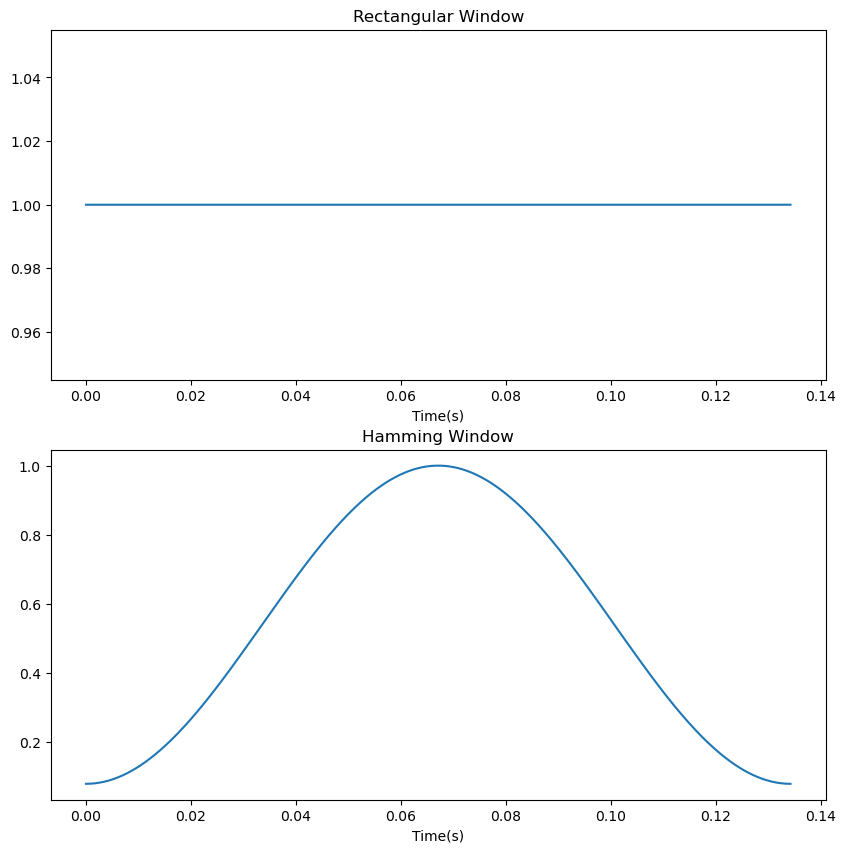

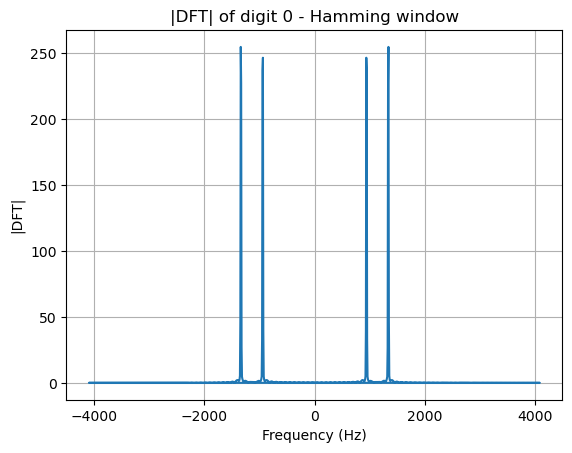

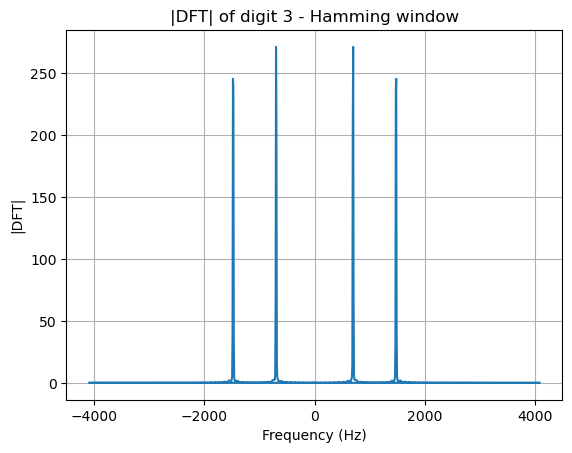

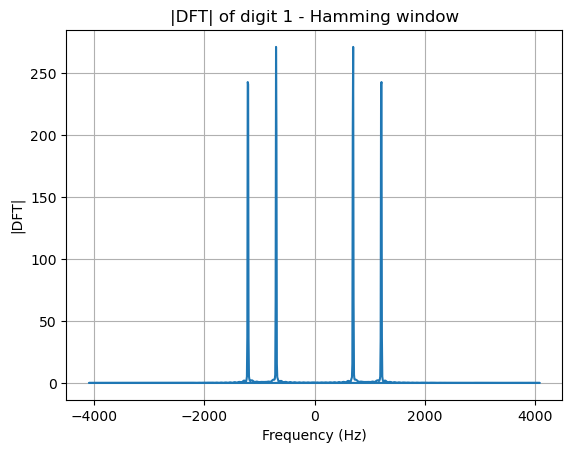

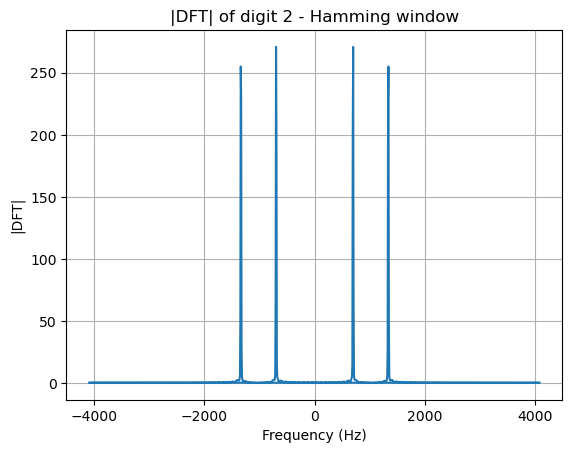

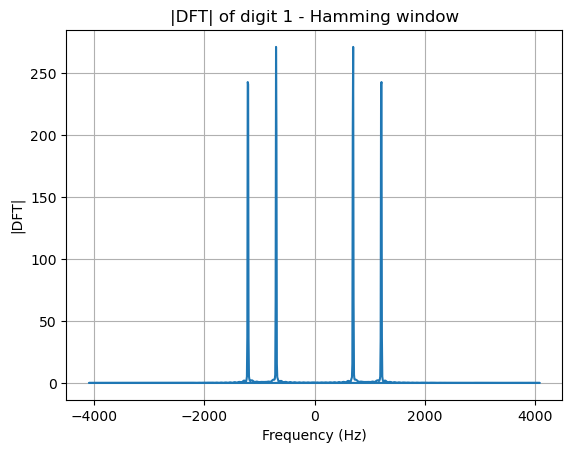

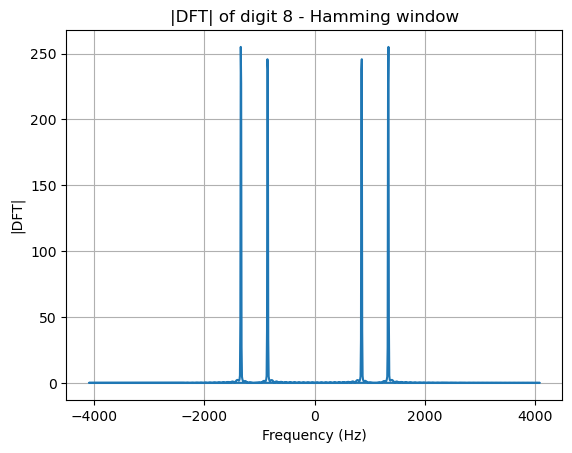

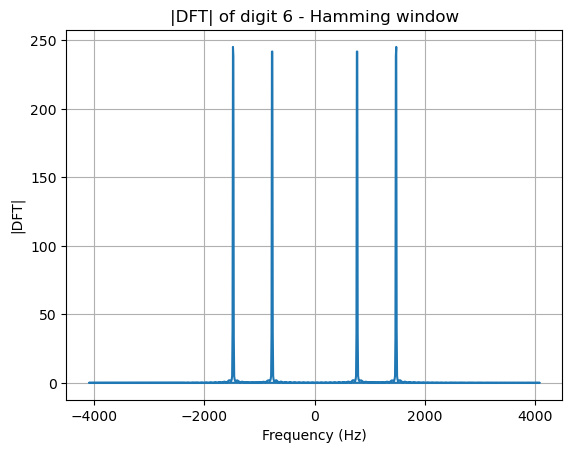

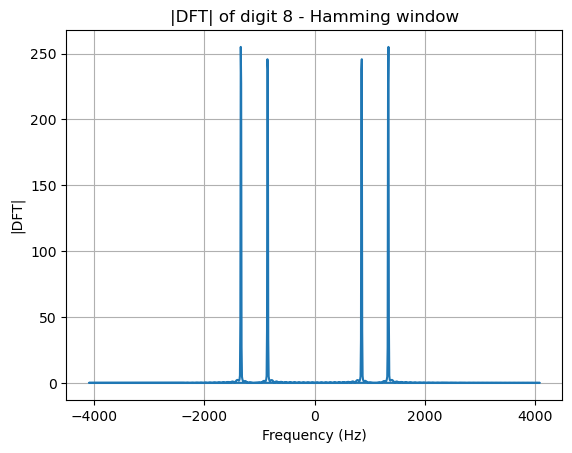

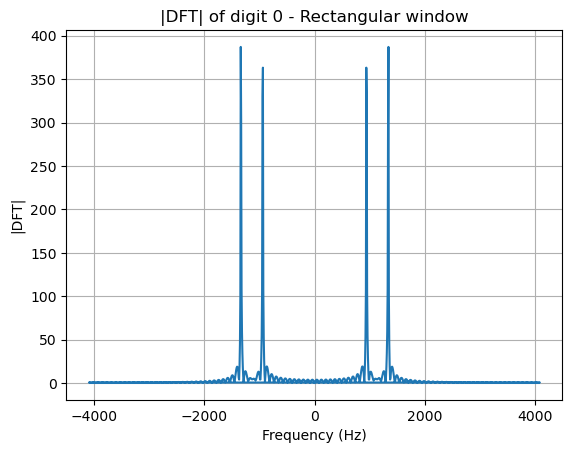

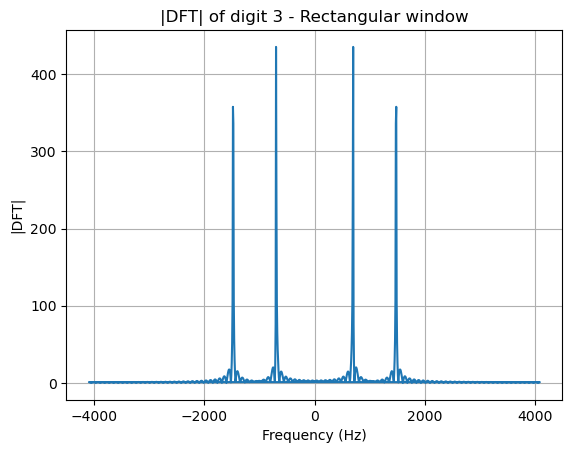

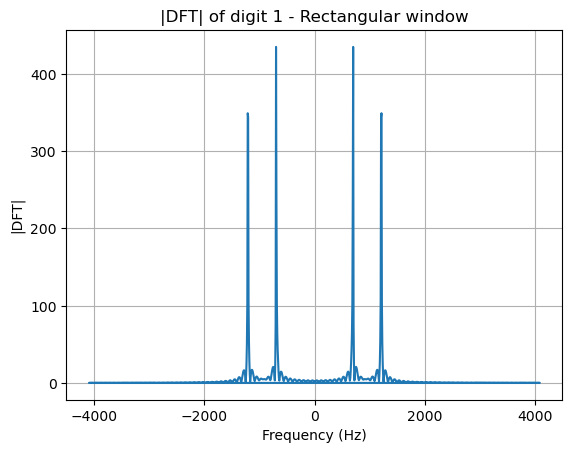

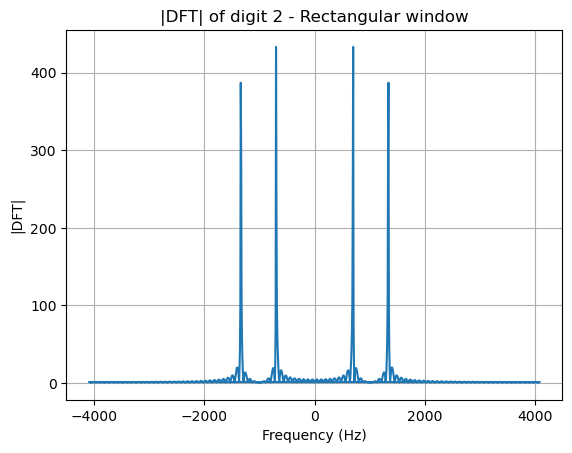

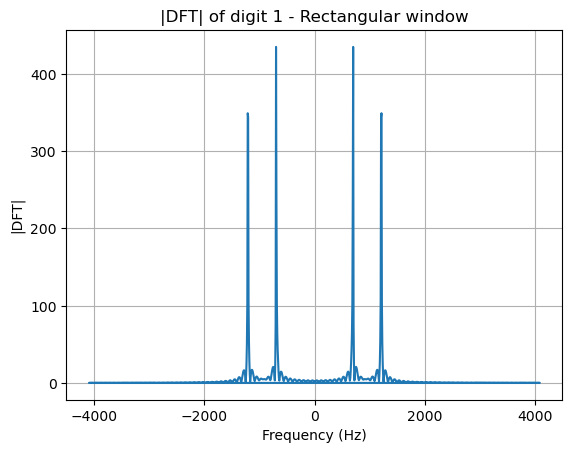

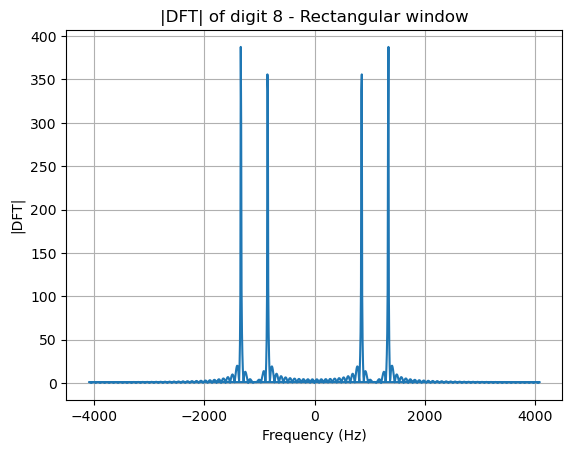

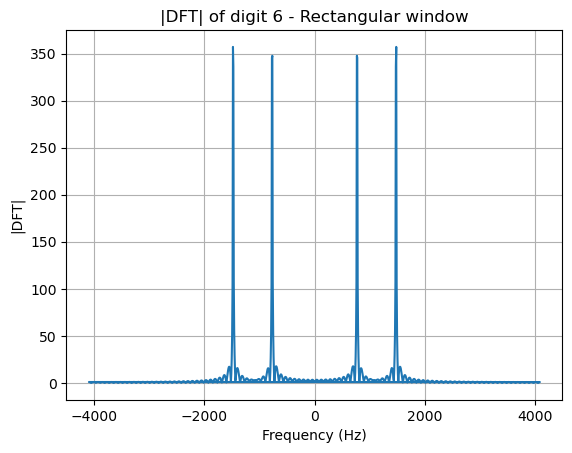

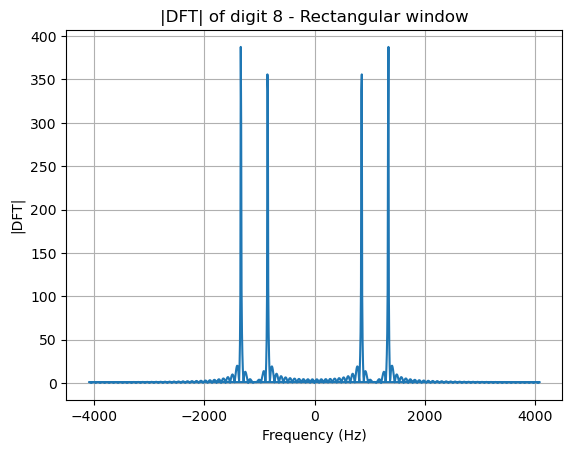

In [4]:
#1.4
#Window's length
L=1100

#Rectangular window 
rec_window = np.ones(L)
#Hamming window - AM signal
ham_window = np.hamming(L)

plt.figure(figsize = (10,10))
time = np.linspace(0,L/8192,L)
plt.subplot(2,1,1)
plt.plot(time,rec_window)
plt.xlabel("Time(s)")
plt.title("Rectangular Window")

plt.subplot(2,1,2)
plt.plot(time,ham_window)
plt.xlabel("Time(s)")
plt.title("Hamming Window")

#Hamming * tones
AM_digits = [0,3,1,2,1,8,6,8]
for tone, digit in zip(extended_signals_list,AM_digits):
    hamming = tone * ham_window
    DFT_ham = np.fft.fft(hamming)
    plt.figure()
    freq = np.fft.fftfreq(len(hamming), 1 / 8192)
    plt.plot(freq, abs(DFT_ham))
    plt.title(f"|DFT| of digit {digit} - Hamming window")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("|DFT|")
    plt.grid(True)

#Rectangular * tones
#Hamming * tones
AM_digits = [0,3,1,2,1,8,6,8]
for tone, digit in zip(extended_signals_list,AM_digits):
    rectangular = tone * rec_window
    DFT_rec = np.fft.fft(rectangular)
    plt.figure()
    freq = np.fft.fftfreq(len(rectangular), 1 / 8192)
    plt.plot(freq, abs(DFT_rec))
    plt.title(f"|DFT| of digit {digit} - Rectangular window")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("|DFT|")
    plt.grid(True)


In [5]:
#1.5
#List of frequencies near the touch tones
tone_list = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]
DFTs_of_tones = []
dict_of_k = {}

#Cretaing a list of Dft's
for tone in tone_list:
    DFT = np.fft.fft(tone,1024)
    DFTs_of_tones.append(DFT)

#Creating a list with energies of each DFT and getting the 2 frequencies of the greater
#and the second greater energies and putting them in a list 
for i, DFT in enumerate(DFTs_of_tones):
    energies = (np.abs(DFT))**2
    #max energy 
    maximum_energy = np.max(energies)
    #second max energy
    second_maximum_energy = np.max(energies[energies != maximum_energy])

    #finding the frequencies
    for k in range (len(abs(DFT))):
        max_energy_frequency = np.where(energies == maximum_energy)[0][0]
        second_max_energy_frequency = np.where(energies == second_maximum_energy)[0][0]
        #frequencies_above_minimum_energy.append(k)
        dict_of_k[i] = [max_energy_frequency,second_max_energy_frequency]
        max_energies = [ maximum_energy,second_maximum_energy]
    print(f"The two greater energies of digit {i}")
    print(max_energies)

#Printing the list of k 
print("\n List of k = ")
for i in (dict_of_k):
    print(f" digit{i}:{dict_of_k[i]}")


The two greater energies of digit 0
[229076.79430721106, 199350.37704250013]
The two greater energies of digit 1
[216220.8361380998, 216220.83613809978]
The two greater energies of digit 2
[227455.31999699745, 227455.3199969973]
The two greater energies of digit 3
[221957.65273139894, 216948.59833747908]
The two greater energies of digit 4
[194312.06347057933, 168323.35386232645]
The two greater energies of digit 5
[228014.76713314166, 228014.7671331416]
The two greater energies of digit 6
[221573.57742929985, 168704.09347711658]
The two greater energies of digit 7
[194296.27568024144, 194296.27568024138]
The two greater energies of digit 8
[227823.60072293025, 227823.6007229302]
The two greater energies of digit 9
[221808.9511575135, 150805.3735174227]

 List of k = 
 digit0:[167, 118]
 digit1:[937, 87]
 digit2:[167, 857]
 digit3:[185, 87]
 digit4:[151, 96]
 digit5:[167, 857]
 digit6:[185, 96]
 digit7:[151, 873]
 digit8:[167, 857]
 digit9:[185, 917]


In [6]:
#1.7
#Apllying ttdecode
import librosa 

mediumSig και hardSig
easySig = librosa.load("easySig")
mediumSig = librosa.load("mediumSig")
hardSig = librosa.load("hardSig")

print("The easySig includes the digits: ", ttdecode(easySig))
print("The mediumSig includes the digits: ", ttdecode(mediumSig))
print("The hardSig includes the digits: ", ttdecode(hardSig))


SyntaxError: invalid syntax (2473839844.py, line 5)